# 3. word2vec

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.1-신경망에서의-단어-처리" data-toc-modified-id="3.1-신경망에서의-단어-처리-1">3.1 신경망에서의 단어 처리</a></span></li><li><span><a href="#3.2-단순한-word2vec" data-toc-modified-id="3.2-단순한-word2vec-2">3.2 단순한 word2vec</a></span><ul class="toc-item"><li><span><a href="#3.2.1-CBOW" data-toc-modified-id="3.2.1-CBOW-2.1">3.2.1 CBOW</a></span></li></ul></li></ul></div>

## 3.1 신경망에서의 단어 처리

In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

In [35]:
plt.rc('font', family='NanumGothic')
plt.rc('font', size=13)

In [3]:
c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
h = np.matmul(c, W)
print(h)

[[ 0.71287205 -0.42864757  0.72334921]]


In [6]:
W

array([[ 0.71287205, -0.42864757,  0.72334921],
       [-0.81640333,  0.49607485,  0.51385851],
       [ 1.02740514, -0.26630637,  2.00042019],
       [-1.12697286,  0.45495463,  0.78785821],
       [ 0.25138309,  0.55771885, -0.34822245],
       [-0.43199326, -1.26327488, -2.38544054],
       [ 0.10142944,  0.23913316, -1.07912562]])

In [7]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

In [10]:
c = np.array([[1, 0, 0, 0, 0, 0, 0]])
W = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[[-0.64854254  0.92421965  0.78320047]]


In [11]:
W

array([[-0.64854254,  0.92421965,  0.78320047],
       [ 0.01155805, -1.23463627, -0.12095493],
       [-0.97425778, -1.07981777, -1.52680996],
       [-0.66965704,  0.15167328,  0.35523063],
       [ 2.59432074, -0.10478464, -0.9026905 ],
       [ 0.14494876,  1.97515235,  1.79817731],
       [-1.14516683,  0.81980567, -0.93576477]])

## 3.2 단순한 word2vec

### 3.2.1 CBOW

In [31]:
# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

In [32]:
print(s)

[[-0.31851705 -0.47125903  0.69244052  0.91270689  0.65357001 -1.02161135
   0.92031161]]


In [37]:
from common.util import preprocess

text = 'You say goodbe and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbe', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [43]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    
    return np.array(contexts), np.array(target)

In [44]:
print(corpus)
corpus[1:-1]

[0 1 2 3 4 1 5 6]


array([1, 2, 3, 4, 1, 5])

In [45]:
contexts, target = create_contexts_target(corpus)

In [47]:
contexts, target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]),
 array([1, 2, 3, 4, 1, 5]))

In [48]:
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [49]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [50]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [57]:
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_outt = 0.01 * np.random.randn(H, V).astype('f')
        
        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 가중치와 기울기를 리스트에 모으기
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0+h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [60]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [61]:
contexts[:,0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int32)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 358 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 359 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 360 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 361 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 362 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 363 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 364 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 365 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 366 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 367 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 368 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 369 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 370 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 371 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 372 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 373 |  반복 1

| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 661 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 662 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 664 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 665 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 671 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 672 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 673 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 674 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 675 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 676 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 677 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 678 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 679 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 680 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 681 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 682 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 683 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 684 |  반복 1

| 에폭 966 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 967 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 968 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 969 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 970 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 971 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 972 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 973 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 974 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 975 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 976 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 977 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 978 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 979 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 980 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 981 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 982 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 983 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 984 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 985 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 986 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 987 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 988 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 989 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 990 |  반복 1

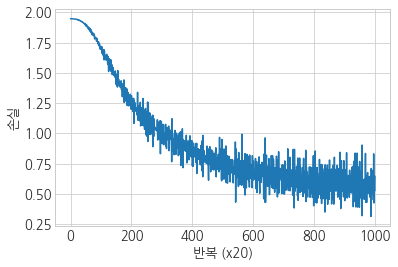

In [62]:
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size=1
hidden_size=5
batch_size=3
max_epoch=1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [63]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.2199228 -1.2312355  1.1088136 -1.1568872  1.1140016]
say [-0.11836025  1.2497216  -1.2781178   0.91489816 -1.2463951 ]
goodbye [ 0.77817297 -0.66092116  0.7738464  -0.79321367  0.81925684]
and [-1.7281721   0.9669975  -0.90707356  1.4867557  -0.9734661 ]
i [ 0.76470083 -0.65595937  0.7753097  -0.79872966  0.80756515]
hello [ 1.22372   -1.216005   1.1232343 -1.1691568  1.1058384]
. [ 1.6548625  1.1489938 -1.1961241 -1.4020281 -1.1370387]
